In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3> (1) Simulated Annealing for TSP </h3> 

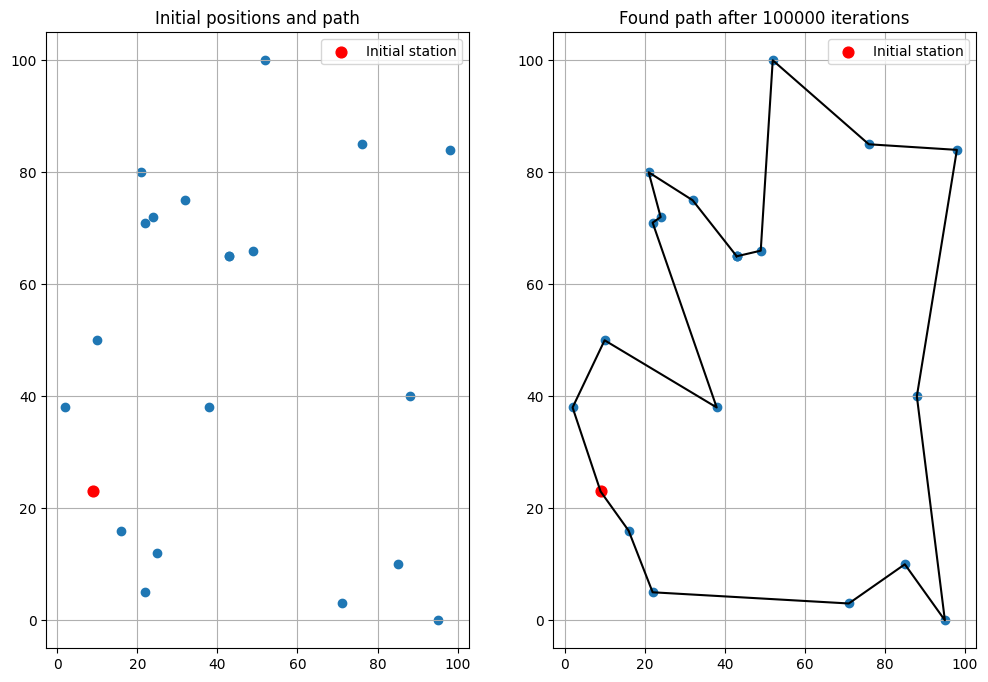

In [21]:
def cool(k):
    return 1/np.sqrt(1+k)


#permute two random stations (except first and final one)
def permute(x):
    n = x.shape[0]
    y = x.copy()
    idx1 = int(np.random.randint(1, n-1))
    idx2 = int(np.random.randint(1, n-1))
    while idx1 == idx2:
        idx2 = int(np.random.randint(1, n-1))
    t = y[idx1]
    y[idx1] = y[idx2]
    y[idx2] = t
    return y

# gives the cost (sum of euclidean distances) for the current path
def CostEuclid(route,coord):
    dist = [ np.sqrt( (coord[route[N+1] ,0] - coord[route[N] ,0])**2 + (coord[route[N+1] ,1] - coord[route[N] ,1])**2)  for N in range(len(route)-1)]
    return np.sum(dist)

# for the initialization of the positions
def random_coordinates(X):
    C= np.random.randint(0,100+1,[len(X)-1,2]).tolist()
    C.insert(X[-1],C[X[-1]])
    return np.array(C)

# initialization of variables
x = np.array(range(20))
np.random.shuffle(x)
x = np.append(x, x[0])
positions = random_coordinates(x)
costx= CostEuclid(x, positions)
best_cost = CostEuclid(x, positions)

cost_list = [best_cost]
ks = 0.0001

for _ in range(100000):

    T = cool(ks)

    #sampling a new proposal, randomly switching two stations
    y = permute(x)
    costx = CostEuclid(x, positions)
    costy = CostEuclid(y, positions)

    # acccptance or rejection of the proposal
    if costy < costx:
        best_cost = costy
        x = y.copy()
    
    p = np.exp(-(costy - costx)/T)
    u = np.random.uniform(0,1)
    if u < p:
        best_cost = costy
        x = y.copy()

    cost_list.append(best_cost)
    ks = ks+0.0001


fig, axs = plt.subplots(1,2, figsize = (12,8))
axs[0].scatter(positions[:,0],positions[:,1])
axs[0].set_title('Initial positions and path')
axs[0].grid()
axs[0].scatter(positions[0,0], positions[0,1], label = 'Initial station', color = 'r', s = 60)
axs[0].legend()
axs[1].scatter(positions[x][:,0],positions[x][:,1])
axs[1].plot(positions[x][:,0],positions[x][:,1], color = 'black')
axs[1].set_title('Found path after 100000 iterations')
axs[1].grid()
axs[1].scatter(positions[0,0], positions[0,1], label = 'Initial station', color = 'r', s = 60)
axs[1].legend()
plt.show()

<h3> Simulated Annealing using the provided cost matrix </h3>

In [11]:
# read the file with the cost matrix
data = pd.read_csv('C:/Users/PC/Documents/DTU/SS/Exercises/cost.csv', header = None)
costs = data.values

# gives the cost of the current path using data in the cost matrix
def cost(route):
    tot = 0
    for i in range(len(route)-1):
        tot += costs[route[i], route[i+1]]
    return tot


#initialization
x = np.array(range(20))
np.random.shuffle(x)
x = np.append(x, x[0])
costx = cost(x)

cost_list = [costx]
ks = 0.0001
for _ in range(100000):

    T = cool(ks)
    # sampling a new proposal, randomly switching two stations
    y = permute(x)
    costx = cost(x)
    costy = cost(y)

    #acceptance or rejection of the new proposal
    if costy < costx:
        best_cost = costy
        x = y.copy()
    
    p = np.exp(-(costy - costx)/T)
    u = np.random.uniform(0,1)
    if u < p:
        best_cost = costy
        x = y.copy()

    cost_list.append(best_cost)
    ks = ks+0.0001

print('The found path is:', y)

array([ 1, 18, 19, 10,  2,  6, 17, 16,  0,  9,  3, 11,  5, 14, 13,  8, 15,
       12,  4,  7,  1])